# Intro to Numpy Homework--Worked Version

Warning!  Please don't look at this worked version until you've attempted problems yourself.

A key part of programming in python (or any other language) is the need to know where to go to find help.  There are many useful sites (the numpy api page, stack overflow, geeksforgeeks, ...) but the easiest is to simply google it.  Here we are going to walk through the concepts from the numpy lesson and google when we need more information.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/jayunruh/python_introDS_course/blob/master/intro_numpy_homework_worked.ipynb)

To start, as always, import numpy and matplotlib:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Firstly, let's use a numpy function called logspace to create an log base 10 spaced array from 0.01 to 6.14 with 20 points in it.  Don't know how to use logspace?  Google it!  Print your array to see what it output.  Then plot the array.

In [2]:
logarr=np.logspace(-2,np.log10(6.14),20) #hint--don't forget that the first two arguments are in log units
print(logarr)

[0.01       0.01401993 0.01965583 0.02755733 0.03863517 0.05416622
 0.07594063 0.1064682  0.14926763 0.2092721  0.29339792 0.4113417
 0.576698   0.8085263  1.13354784 1.58922561 2.22808246 3.123755
 4.37948121 6.14      ]


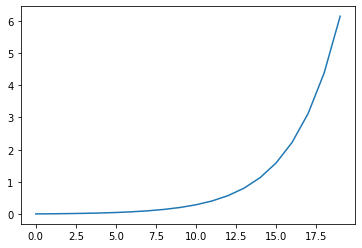

In [3]:
plt.plot(logarr)

The matplotlib plot function has format codes to change how a plot looks.  Show the plot as connected red points (as before google it if you don't know how).

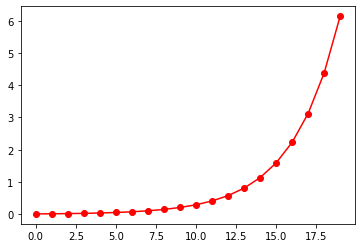

In [4]:
plt.plot(logarr,'ro-') #the easiest way to get connected dots is the color letter with o- after it

Now stack 20 of these together into a numpy array (as we did in the lesson) and show the corresponding image.

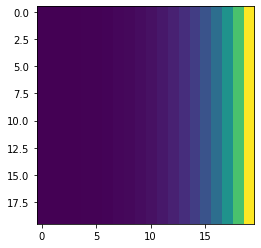

In [5]:
stacked=np.array([logarr]*20)
plt.imshow(stacked)

The matplotlib imshow function allows for different colormaps.  Try showing our image with the jet lookup table and show the colorbar for reference.  If you don't know how?  You guessed it.

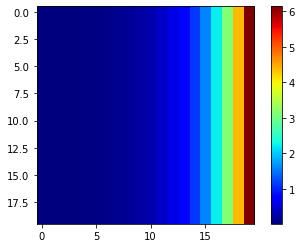

In [6]:
plt.imshow(stacked,cmap='jet') #note that gray is the normal black/white color map if you want to avoid crazy colors
plt.colorbar()

Now calculate the sine function of our stacked array and show it side by side with the stacked image and a sliced horizontal profile.

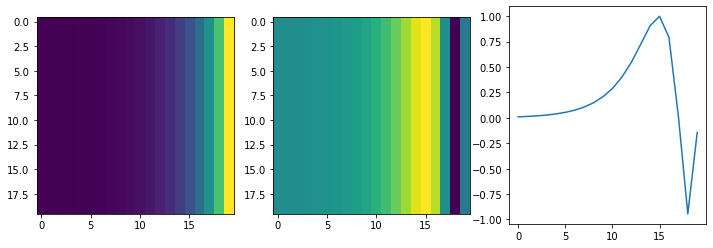

In [7]:
sinstacked=np.sin(stacked)
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(12,4))
axs[0].imshow(stacked)
axs[1].imshow(sinstacked)
axs[2].plot(sinstacked[0,:])

It would be cool to do a vertical profile instead of a horizontal profile.  Of course we could calculate the profile line-by-line, but the transpose function should rotate the array for us (look it up).  Show an image of the transposed array.

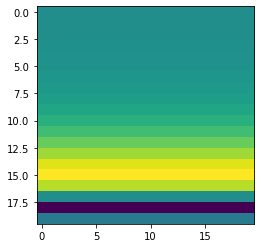

In [8]:
vsinstacked=sinstacked.transpose()  
#note that I could have used np.transpose here but many ndarray operations can be called with array.operation
plt.imshow(vsinstacked)

Looking carefully at the transpose function description it says it tries not to copy the array if possible.  Make a modification to the transposed array and see if it affects the original--show them side by side.

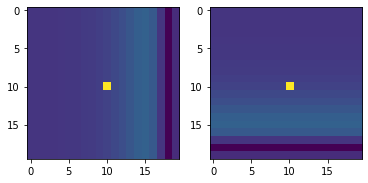

In [9]:
vsinstacked[10,10]+=5
fig,axs=plt.subplots(nrows=1,ncols=2)
axs[0].imshow(sinstacked)
axs[1].imshow(vsinstacked)

Now get back your original stacked and transposed arrays.  I want you to create a windmill shaped object by copying rotated versions of the array four times and appending them all together.  Here is a table illustrating the arrangement:

&nbsp;|Col1|Col2
-----|:---:|:---:
**Row1** | original | transposed
**Row2** | trans_flipped_vert | orig_flipped_hor

Hint--you might need to use advanced slicing to do the flipping.

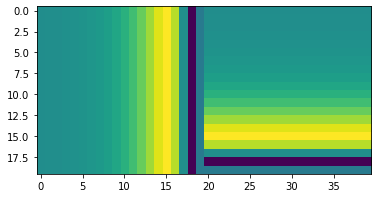

In [10]:
#first recreate our arrays
sinstacked=np.sin(stacked)
vsinstacked=sinstacked.transpose()
#stack them together to make teh top of the windmill
halfwindmill=np.append(sinstacked,vsinstacked,axis=1)
#here we have it half way--show it to make sure
plt.imshow(halfwindmill)

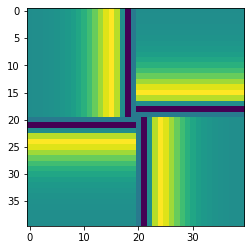

In [11]:
#now horizontally flip the original for the lower right quadrant
hflipped=sinstacked[:,::-1]
#and vertically flip the transposed one for the lower left quadrant
vtranssinstacked=vsinstacked[::-1,:]
#append those together to get the bottom half
halfwindmill2=np.append(vtranssinstacked,hflipped,axis=1)
#now apppend the halves (on axis 0 this time)
windmill=np.append(halfwindmill,halfwindmill2,axis=0)
#and show it
plt.imshow(windmill)

Now let's add some "speckles" to a copy of our windmill. Pick 40 random positions in our array and set them to 2.  Random numbers can be generated with np.random.randint (look it up).  Hint: arrays of integers can be used to slice a numpy array.

In [12]:
windmill2=windmill.copy()
randx=np.random.randint(0,40,40)
randy=np.random.randint(0,40,40)
windmill2[randy,randx]=2.0

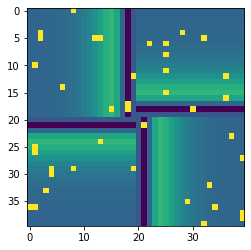

In [13]:
plt.imshow(windmill2)

Now use boolean array slicing to set all of those 2 values to -2 in another copy.

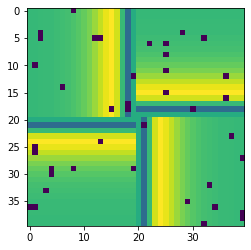

In [14]:
windmill3=windmill2.copy()
windmill3[windmill3>1.5]=-2.0
plt.imshow(windmill3)